In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Netflix TV Shows and Movies.csv')

In [3]:
#TRY PCA later on
#There are things that can be done with text such as in title and description
#Cosine similarity
#Nouns and adjectives are useful in the descriptions
#Find top 100 nouns and adjetives and create dummy columns

#Research the spacy library
#nltk library

In [4]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [6]:
df.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [7]:
df.age_certification.unique()

array(['R', 'PG', 'TV-14', 'G', 'PG-13', nan, 'TV-MA', 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

In [8]:
df['age_certification'] = df['age_certification'].map({
    'G': 0,
    'TV-Y': 1,
    'TV-G': 2,
    'TV-Y7': 3,
    'PG': 4,
    'TV-PG': 5,
    'PG-13': 6,
    'TV-14': 7,
    'R': 8,
    'NC-17': 9,
    'TV-MA': 10
}
)
df['age_certification'] = df['age_certification'].fillna(11)
df['age_certification'] = df['age_certification'].astype(int)
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,8,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,4,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,8,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,8,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,7,30,tt0063929,8.8,72895.0


In [9]:
df.type.unique()

array(['MOVIE', 'SHOW'], dtype=object)

In [10]:
df['type'] = df['type'].map({'MOVIE':1,'SHOW':0})

In [11]:
df_2 = df[['release_year','runtime','imdb_score','imdb_votes','age_certification','type']]

In [12]:
df_2.head()

,release_year,runtime,imdb_score,imdb_votes,age_certification,type
0,1976,113,8.3,795222.0,8,1
1,1975,91,8.2,530877.0,4,1
2,1979,94,8.0,392419.0,8,1
3,1973,133,8.1,391942.0,8,1
4,1969,30,8.8,72895.0,7,0


In [13]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_year       5283 non-null   int64  
 1   runtime            5283 non-null   int64  
 2   imdb_score         5283 non-null   float64
 3   imdb_votes         5267 non-null   float64
 4   age_certification  5283 non-null   int32  
 5   type               5283 non-null   int64  
dtypes: float64(2), int32(1), int64(3)
memory usage: 227.1 KB


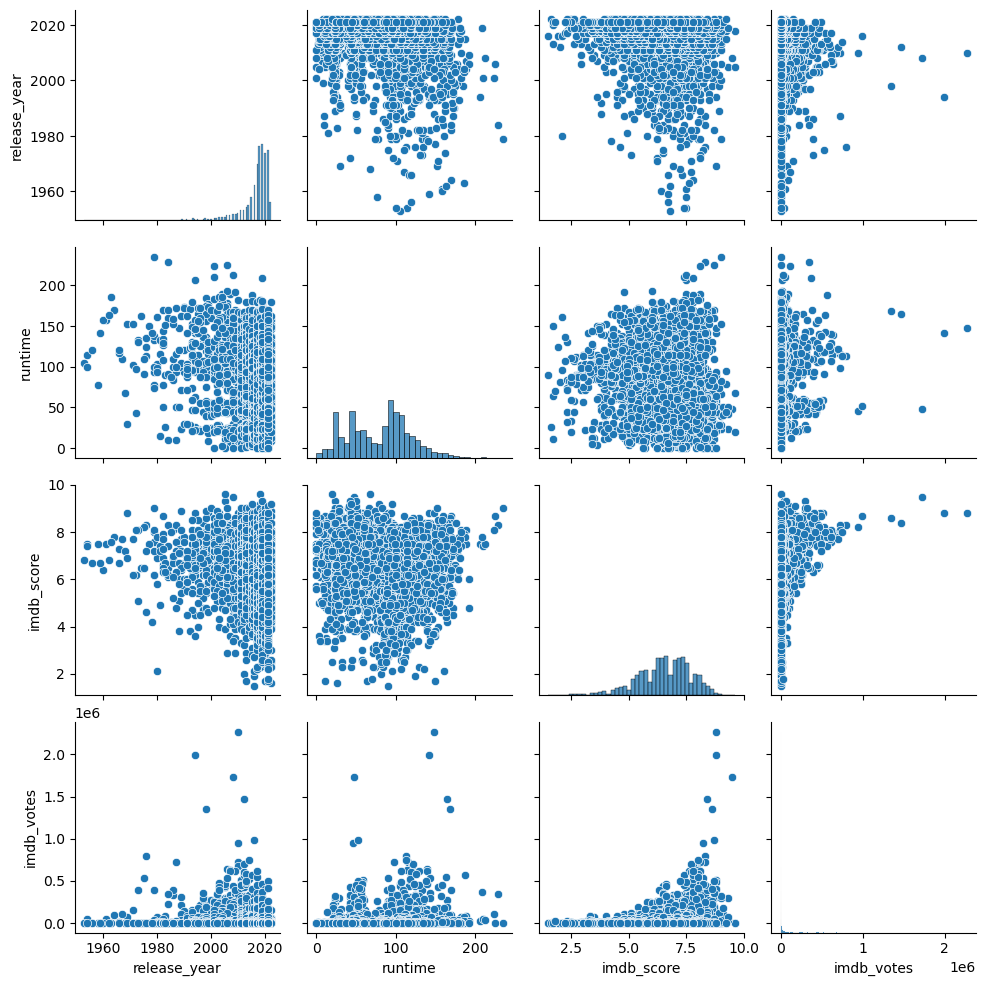

In [14]:
sns.pairplot(df_2[['release_year','runtime','imdb_score','imdb_votes']])

<Axes: >

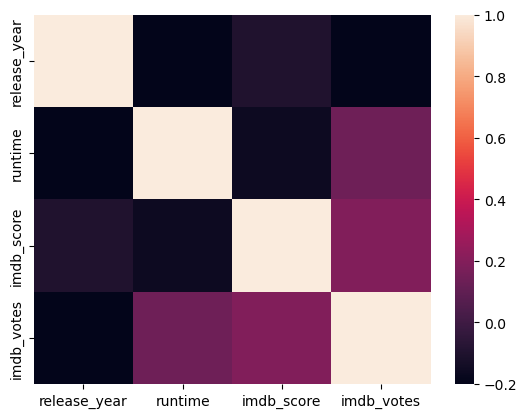

In [15]:
sns.heatmap(df_2[['release_year','runtime','imdb_score','imdb_votes']].corr())

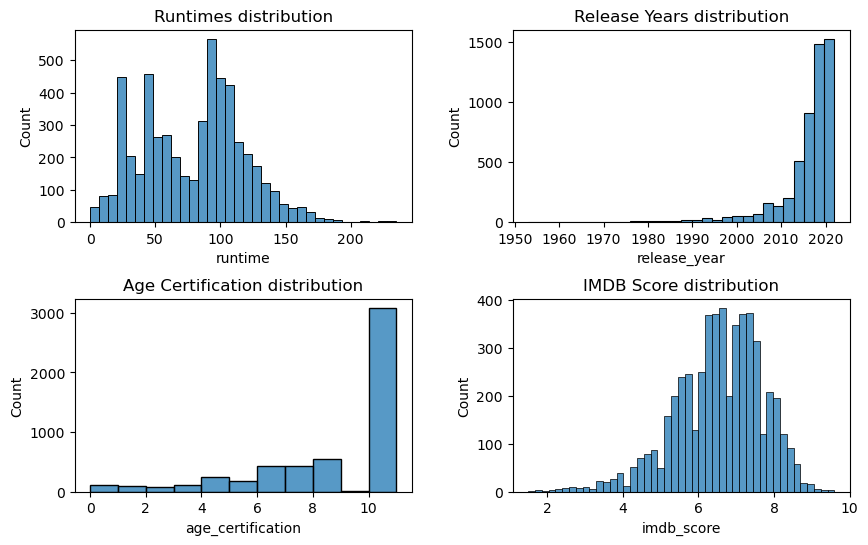

In [16]:
fig, ax = plt.subplots(2,2,figsize=(10,6)) 
sns.histplot(df_2['runtime'],ax=ax[0,0])
ax[0,0].set_title('Runtimes distribution')

sns.histplot(df_2['release_year'],bins=30,ax=ax[0,1])
ax[0,1].set_title('Release Years distribution')

sns.histplot(df_2['age_certification'],bins=11,ax=ax[1,0])
ax[1,0].set_title('Age Certification distribution')

sns.histplot(df_2['imdb_score'],ax=ax[1,1])
ax[1,1].set_title('IMDB Score distribution')

plt.subplots_adjust(wspace=0.3, hspace=0.4)

plt.show()

In [17]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_year       5283 non-null   int64  
 1   runtime            5283 non-null   int64  
 2   imdb_score         5283 non-null   float64
 3   imdb_votes         5267 non-null   float64
 4   age_certification  5283 non-null   int32  
 5   type               5283 non-null   int64  
dtypes: float64(2), int32(1), int64(3)
memory usage: 227.1 KB


In [18]:
df_2.dropna(inplace=True)

C:\Users\mainf\AppData\Local\Temp\ipykernel_28704\600093465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.dropna(inplace=True)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
X = np.array(df_2.drop('imdb_score',axis=1).dropna())
y = df_2[['imdb_score']].dropna()

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Assuming X_train, X_test, y_train, y_test are defined
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Calculating metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


MAE: 0.836330696136755
MSE: 1.1588677777179435
RMSE: 1.0765072121067947
R-squared: 0.12459118293597915


In [23]:
print(predictions)

[[6.18719934]
 [6.36034243]
 [6.13363327]
 ...
 [6.40659358]
 [6.12433618]
 [6.53205653]]


In [24]:
X_test.size

6585

In [25]:
y_test.size

1317

In [26]:
predictions.size

1317

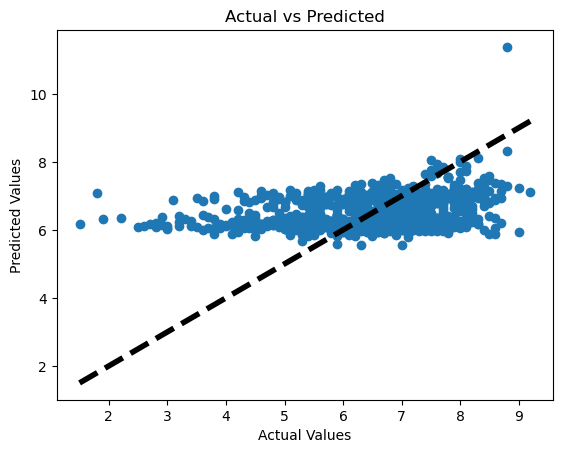

In [27]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()



In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [30]:
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)
predictions = model2.predict(X_test_scaled)

# Calculating metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MAE: 0.8363306961367564
MSE: 1.1588677777179457
RMSE: 1.0765072121067958
R-squared: 0.12459118293597748


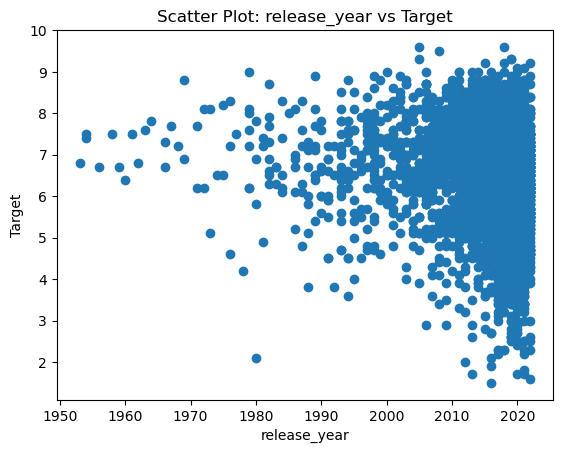

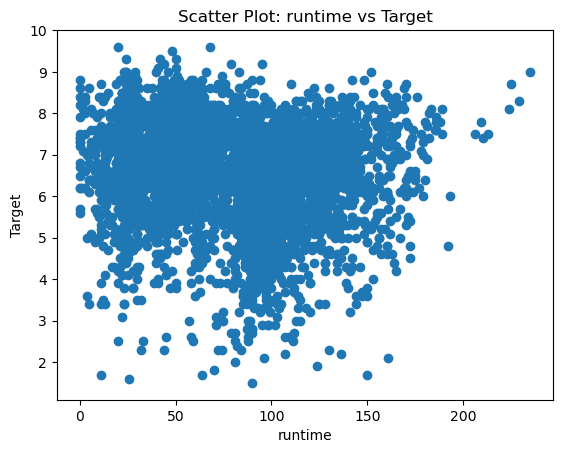

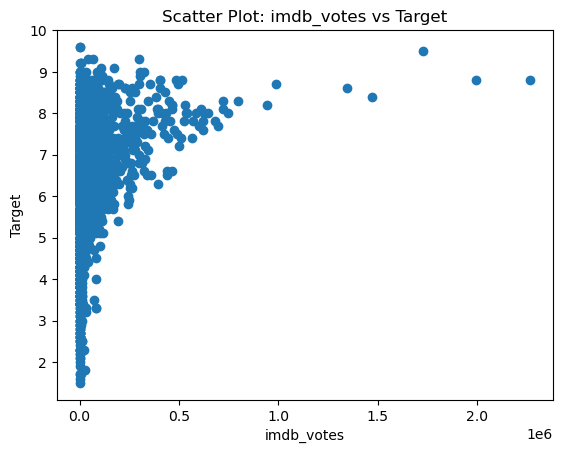

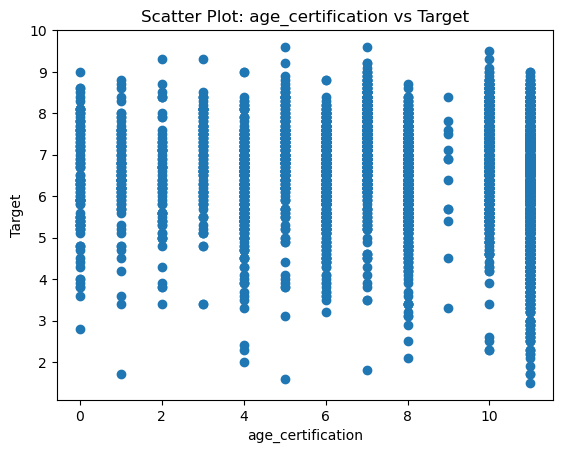

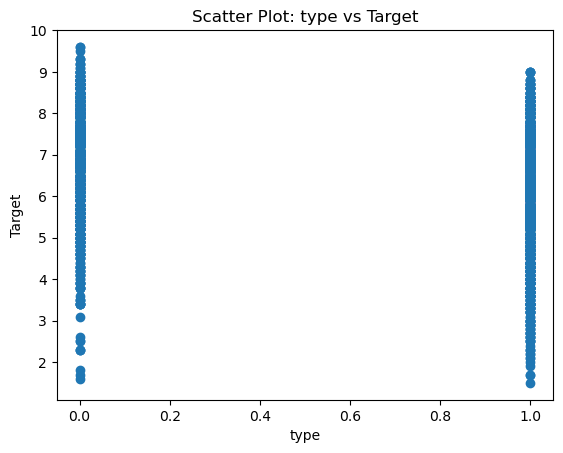

In [31]:
import matplotlib.pyplot as plt


features = df_2.columns.drop('imdb_score') 

for feature in features:
    plt.scatter(df_2[feature], df_2['imdb_score'])
    plt.title(f'Scatter Plot: {feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.show()



In [32]:
correlation_matrix = df_2.corr()
print(correlation_matrix['imdb_score']) 


release_year        -0.102952
runtime             -0.158390
imdb_score           1.000000
imdb_votes           0.189954
age_certification   -0.059993
type                -0.310083
Name: imdb_score, dtype: float64


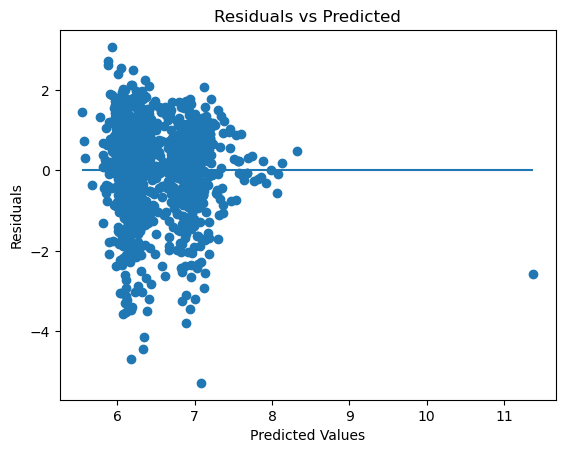

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Initializing and fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_scaled)

# Plotting the residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# List of models to evaluate
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor(),
    DecisionTreeRegressor()
]

# Dictionary to hold the scores
model_scores = {}

# Evaluate each model
for model in models:
    # Compute cross-validation score
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    model_scores[model.__class__.__name__] = -scores.mean()

# Display the scores
for model_name, score in model_scores.items():
    print(f"{model_name}: MSE = {score:.4f}")


C:\Users\mainf\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\mainf\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\mainf\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\mainf\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

LinearRegression: MSE = 1.1324
Ridge: MSE = 1.1324
Lasso: MSE = 1.2632
RandomForestRegressor: MSE = 1.0686
GradientBoostingRegressor: MSE = 1.0209
SVR: MSE = 1.3005
KNeighborsRegressor: MSE = 1.3769
DecisionTreeRegressor: MSE = 1.9077


In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train_scaled)
X_pca_test = pca.transform(X_test_scaled)


MAE: 0.8702965414760155
MSE: 1.22415040167048
RMSE: 1.1064133050856177
R-squared: 0.07527668329421333


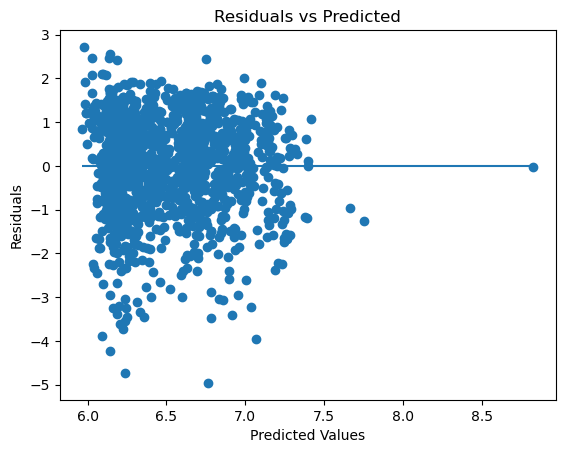

In [36]:
# Initializing and fitting the Linear Regression model
model = LinearRegression()
model.fit(X_pca_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_pca_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

# Plotting the residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [37]:
!pip install spacy

In [38]:

!pip install spacy
!python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")



     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.1 MB/s eta 0:00:13
     ---------------------------------------- 0.1/12.8 MB 1.1 MB/s eta 0:00:13
     --------------------------------------- 0.2/12.8 MB 893.0 kB/s eta 0:00:15
      -------------------------------------- 0.2/12.8 MB 888.4 kB/s eta 0:00:15
      -------------------------------------- 0.2/12.8 MB 860.2 kB/s eta 0:00:15
      -------------------------------------- 0.3/12.8 MB 930.9 kB/s eta 0:00:14
     - -------------------------------------- 0.4/12.8 MB 1.0 MB/s eta 0:00:13
     - -------------------------------------- 0.5/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.5/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 1.2 MB/s eta 0:00:10
     -- ------------------------------------- 0.7/12.8 MB 1.3 

In [39]:
df_2['description'] = df.loc[:,'description']
df_2.head()

C:\Users\mainf\AppData\Local\Temp\ipykernel_28704\3749894006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['description'] = df.loc[:,'description']


,release_year,runtime,imdb_score,imdb_votes,age_certification,type,description
0,1976,113,8.3,795222.0,8,1,A mentally unstable Vietnam War veteran works ...
1,1975,91,8.2,530877.0,4,1,"King Arthur, accompanied by his squire, recrui..."
2,1979,94,8.0,392419.0,8,1,"Brian Cohen is an average young Jewish man, bu..."
3,1973,133,8.1,391942.0,8,1,12-year-old Regan MacNeil begins to adapt an e...
4,1969,30,8.8,72895.0,7,0,A British sketch comedy series with the shows ...


In [40]:
first_description = df_2.loc[0,'description']

In [41]:
doc = nlp(first_description)

print([token.text for token in doc])

['A', 'mentally', 'unstable', 'Vietnam', 'War', 'veteran', 'works', 'as', 'a', 'night', '-', 'time', 'taxi', 'driver', 'in', 'New', 'York', 'City', 'where', 'the', 'perceived', 'decadence', 'and', 'sleaze', 'feed', 'his', 'urge', 'for', 'violent', 'action', ',', 'attempting', 'to', 'save', 'a', 'preadolescent', 'prostitute', 'in', 'the', 'process', '.']


In [42]:
df_2 = df_2.dropna(subset=['description'])

In [43]:
df_2['description'].isna().sum()

0

In [44]:
df_2['description']

0       A mentally unstable Vietnam War veteran works ...
1       King Arthur, accompanied by his squire, recrui...
2       Brian Cohen is an average young Jewish man, bu...
3       12-year-old Regan MacNeil begins to adapt an e...
4       A British sketch comedy series with the shows ...
                              ...                        
5278    Three women with totally different lives accid...
5279    A beautiful love story that can happen between...
5280    A man from Nigeria returns to his family in Ca...
5281    A family faces destruction in a long-running c...
5282    With winter behind them, Bheem and his townspe...
Name: description, Length: 5263, dtype: object

In [45]:
descriptions = df_2['description']
tokens = []

for i in descriptions:
    docs = nlp(i)

    tokens.append([doc.text for doc in docs])
    #desc_tokens.append(nlp(i))
print(tokens)    

[['A', 'mentally', 'unstable', 'Vietnam', 'War', 'veteran', 'works', 'as', 'a', 'night', '-', 'time', 'taxi', 'driver', 'in', 'New', 'York', 'City', 'where', 'the', 'perceived', 'decadence', 'and', 'sleaze', 'feed', 'his', 'urge', 'for', 'violent', 'action', ',', 'attempting', 'to', 'save', 'a', 'preadolescent', 'prostitute', 'in', 'the', 'process', '.'], ['King', 'Arthur', ',', 'accompanied', 'by', 'his', 'squire', ',', 'recruits', 'his', 'Knights', 'of', 'the', 'Round', 'Table', ',', 'including', 'Sir', 'Bedevere', 'the', 'Wise', ',', 'Sir', 'Lancelot', 'the', 'Brave', ',', 'Sir', 'Robin', 'the', 'Not', '-', 'Quite', '-', 'So', '-', 'Brave', '-', 'As', '-', 'Sir', '-', 'Lancelot', 'and', 'Sir', 'Galahad', 'the', 'Pure', '.', 'On', 'the', 'way', ',', 'Arthur', 'battles', 'the', 'Black', 'Knight', 'who', ',', 'despite', 'having', 'had', 'all', 'his', 'limbs', 'chopped', 'off', ',', 'insists', 'he', 'can', 'still', 'fight', '.', 'They', 'reach', 'Camelot', ',', 'but', 'Arthur', 'decides

In [46]:
descriptions[0]

'A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action, attempting to save a preadolescent prostitute in the process.'

In [47]:
from collections import Counter

In [48]:
nouns_adjectives = []
for entry in descriptions:
    doc = nlp(entry)
    nouns_adjectives.extend([token.text for token in doc if token.pos_ in ['NOUN', 'ADJ']]) 

word_freq = Counter(nouns_adjectives)
top_nouns_adjectives = word_freq.most_common(100)

# Display the results
print(top_nouns_adjectives)



[('life', 841), ('family', 568), ('world', 549), ('love', 511), ('young', 495), ('new', 436), ('story', 393), ('man', 369), ('friends', 356), ('years', 353), ('series', 342), ('old', 315), ('time', 298), ('year', 295), ('woman', 290), ('™', 285), ('school', 272), ('other', 267), ('father', 265), ('own', 252), ('girl', 242), ('lives', 237), ('people', 229), ('-', 225), ('way', 207), ('day', 200), ('home', 197), ('daughter', 193), ('best', 192), ('first', 191), ('group', 190), ('mother', 187), ('high', 182), ('town', 180), ('special', 179), ('film', 178), ('comedy', 176), ('son', 176), ('mysterious', 173), ('friend', 164), ('more', 163), ('city', 161), ('wife', 157), ('journey', 157), ('show', 152), ('true', 152), ('past', 151), ('team', 145), ('boy', 139), ('secret', 139), ('death', 137), ('stories', 135), ('documentary', 134), ('real', 133), ('small', 132), ('murder', 130), ('women', 127), ('different', 126), ('crime', 125), ('events', 123), ('relationship', 120), ('night', 118), ('hel

In [49]:
len(top_nouns_adjectives)

100

In [50]:
top_nouns_adjectives = [word for word, count in top_nouns_adjectives]

In [51]:
for i in top_nouns_adjectives:
    df_2[i] = 0

C:\Users\mainf\AppData\Local\Temp\ipykernel_28704\2994518537.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_2[i] = 0
C:\Users\mainf\AppData\Local\Temp\ipykernel_28704\2994518537.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_2[i] = 0
C:\Users\mainf\AppData\Local\Temp\ipykernel_28704\2994518537.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. 

In [52]:
df_2.head()

,release_year,runtime,imdb_score,imdb_votes,age_certification,type,description,life,family,world,...,drama,money,dreams,sister,marriage,place,business,childhood,human,drug
0,1976,113,8.3,795222.0,8,1,A mentally unstable Vietnam War veteran works ...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1975,91,8.2,530877.0,4,1,"King Arthur, accompanied by his squire, recrui...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1979,94,8.0,392419.0,8,1,"Brian Cohen is an average young Jewish man, bu...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1973,133,8.1,391942.0,8,1,12-year-old Regan MacNeil begins to adapt an e...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1969,30,8.8,72895.0,7,0,A British sketch comedy series with the shows ...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_2['family'].dtype

dtype('int64')

In [54]:
df_2['description'][1]

'King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wise, Sir Lancelot the Brave, Sir Robin the Not-Quite-So-Brave-As-Sir-Lancelot and Sir Galahad the Pure. On the way, Arthur battles the Black Knight who, despite having had all his limbs chopped off, insists he can still fight. They reach Camelot, but Arthur decides not  to enter, as "it is a silly place".'

In [55]:
len(df_2)

5263

In [81]:
for row, des_words in enumerate(df_2['description']):
    if row < 5263:
        for word in top_nouns_adjectives:
            if word in des_words:
                df_2.loc[row, word] = 1


In [83]:
df_2.life.sum()

811.0

In [84]:
df_2.childhood.sum()

87.0

In [80]:
df_2.head()

,release_year,runtime,imdb_score,imdb_votes,age_certification,type,description,life,family,world,...,drama,money,dreams,sister,marriage,place,business,childhood,human,drug
0,1976.0,113.0,8.3,795222.0,8.0,1.0,A mentally unstable Vietnam War veteran works ...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1975.0,91.0,8.2,530877.0,4.0,1.0,"King Arthur, accompanied by his squire, recrui...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1979.0,94.0,8.0,392419.0,8.0,1.0,"Brian Cohen is an average young Jewish man, bu...",1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1973.0,133.0,8.1,391942.0,8.0,1.0,12-year-old Regan MacNeil begins to adapt an e...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1969.0,30.0,8.8,72895.0,7.0,0.0,A British sketch comedy series with the shows ...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
df_2['description'] = df_2['description'].fillna('No Description')


In [96]:
df_2['description'].dtype

dtype('O')

In [97]:
def extract_entities(text):
    # Convert any non-string input to string
    text = str(text)
    
    doc = nlp(text)
    entities = [ent.label_ for ent in doc.ents]
    return entities



df_2['description_entities'] = df['description'].apply(extract_entities)



In [103]:
df_2[['description_entities']].head()

,description_entities
0,"[GPE, GPE]"
1,"[PERSON, ORG, PERSON, PERSON, PERSON, PERSON, ..."
2,"[PERSON, NORP, PERSON, ORG, PERSON, ORG]"
3,"[DATE, ORG, GPE, PERSON]"
4,[NORP]


In [75]:
X_2 = np.array(df_2.drop(['imdb_score','description'],axis=1).dropna())
y_2 = df_2[['imdb_score']].dropna()

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2)

In [76]:
model2 = LinearRegression()
model2.fit(X_train_2, y_train_2)
predictions = model2.predict(X_test_2)

# Calculating metrics
mae = mean_absolute_error(y_test_2, predictions)
mse = mean_squared_error(y_test_2, predictions)
rmse = mean_squared_error(y_test_2, predictions, squared=False)
r2 = r2_score(y_test_2, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MAE: 0.8232986566638187
MSE: 1.1247276469147265
RMSE: 1.0605317755327874
R-squared: 0.15809986069739246
